In [1]:
from trainModel import *
from torchData import duneADCdata
from torch.utils.data import random_split
import matplotlib.pyplot as plt
# from simpleCNN import Net
from torchvision import datasets, transforms
from torchData import duneADCdata, ToTensor
torch.manual_seed(1516989)
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

In [2]:
import torch
from torchData import duneADCdata, ToTensor


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5,stride=1, padding=3)
        self.pool = nn.MaxPool2d(kernel_size=5,stride=2,padding=2)
        self.batchnorm =  nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(in_channels=16,out_channels=32 , kernel_size=3)
        self.fc1 = nn.Linear(int(1500*1500*2),128)#int(1500*1500*0.25), 120)
        self.fc2 = nn.Linear(128, 84)
        self.fc3 = nn.Linear(84, 2)
        self.drop = nn.Dropout2d(p=0.05)


    def forward(self, x):
        x = x.float()
        x = self.pool(F.relu(self.conv1(x)))
        x = self.drop(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.batchnorm(x)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        x = F.softmax(self.fc3(x))
#         print(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


In [13]:
net = Net()


In [18]:
transform = transforms.Compose([ToTensor()])
batch_size = 64
n_epochs=10
classes = ["radio","SNB"]
# data = duneADCdata("seconddata_cp.csv", "./", transform=transform)
# data = duneADCdata("bigdata_new.csv", "./", transform=transform)
data = duneADCdata("finalData.csv", "./", transform=transform)

# data = data[0:1000]

print(len(data))
lengths = [int(len(data)*0.8),int(len(data))-int(len(data)*0.8)]
trainData, testData= random_split(data,lengths)
n = 0.1
lengths1 = [int(len(trainData)*n),int(len(trainData))-int(len(trainData)*n)]
lengths2 = [int(len(testData)*n),int(len(testData))-int(len(testData)*n)]

trainData,_ = random_split(trainData,lengths1)
testData,_ = random_split(testData,lengths2)

trainLoader = DataLoader(trainData, batch_size=batch_size, shuffle=True,num_workers=14)
testLoader = DataLoader(testData, batch_size=batch_size, shuffle=True,num_workers=14)
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9,weight_decay=0.0001)
print(len(trainData))

32913
2633


In [19]:
net,losses = train(net, trainLoader, optimizer, n_epochs=n_epochs,batch_size=batch_size)
np.savetxt("CNNloss.txt",losses)

Epoch 1/10:
[                                          

/home/lewis/.conda/envs/SparseAIEnv/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[1,     1] loss: 0.432
[1,     2] loss: 0.380
[1,     3] loss: 0.418
[1,     4] loss: 0.423
[1,     5] loss: 0.363
[1,     6] loss: 0.337
[1,     7] loss: 0.398
[1,     8] loss: 0.428
[1,     9] loss: 0.371
[1,    10] loss: 0.383
[1,    11] loss: 0.353
[1,    12] loss: 0.353
[1,    13] loss: 0.384
[1,    14] loss: 0.373
[1,    15] loss: 0.398
[1,    16] loss: 0.375
[1,    17] loss: 0.362
[1,    18] loss: 0.357
[1,    19] loss: 0.350
[1,    20] loss: 0.400
[1,    21] loss: 0.404
[1,    22] loss: 0.353
[1,    23] loss: 0.382
[1,    24] loss: 0.410
[1,    25] loss: 0.414
[1,    26] loss: 0.359
[1,    27] loss: 0.380
[1,    28] loss: 0.377
[1,    29] loss: 0.376
[1,    30] loss: 0.345
[1,    31] loss: 0.358
[1,    32] loss: 0.369
[1,    33] loss: 0.346
[1,    34] loss: 0.366
[1,    35] loss: 0.376
[1,    36] loss: 0.385
[1,    37] loss: 0.358
[1,    38] loss: 0.377
[1,    39] loss: 0.363
[1,    40] loss: 0.368
[1,    41] loss: 0.382
[1,    42] loss: 0.425
Epoch 2/10:
[                     

[9,     3] loss: 0.316
[9,     4] loss: 0.333
[9,     5] loss: 0.327
[9,     6] loss: 0.323
[9,     7] loss: 0.346
[9,     8] loss: 0.332
[9,     9] loss: 0.315
[9,    10] loss: 0.349
[9,    11] loss: 0.335
[9,    12] loss: 0.315
[9,    13] loss: 0.318
[9,    14] loss: 0.331
[9,    15] loss: 0.324
[9,    16] loss: 0.322
[9,    17] loss: 0.316
[9,    18] loss: 0.315
[9,    19] loss: 0.346
[9,    20] loss: 0.332
[9,    21] loss: 0.316
[9,    22] loss: 0.333
[9,    23] loss: 0.320
[9,    24] loss: 0.332
[9,    25] loss: 0.331
[9,    26] loss: 0.318
[9,    27] loss: 0.321
[9,    28] loss: 0.315
[9,    29] loss: 0.334
[9,    30] loss: 0.318
[9,    31] loss: 0.331
[9,    32] loss: 0.347
[9,    33] loss: 0.324
[9,    34] loss: 0.324
[9,    35] loss: 0.332
[9,    36] loss: 0.325
[9,    37] loss: 0.315
[9,    38] loss: 0.316
[9,    39] loss: 0.315
[9,    40] loss: 0.332
[9,    41] loss: 0.362
[9,    42] loss: 0.314
Epoch 10/10:
[                                          [10,     1] loss: 0.333


In [17]:
net.load_state_dict(torch.load("./model/model.pth"))
losses = np.loadtxt(losses)

<All keys matched successfully>

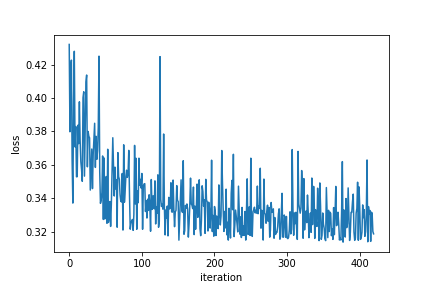

In [20]:
plt.plot(losses)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

[0.37883445 0.34640447 0.34029475 0.33500506 0.33269079 0.33061464
 0.32975785 0.32962863 0.32769355 0.32807258]


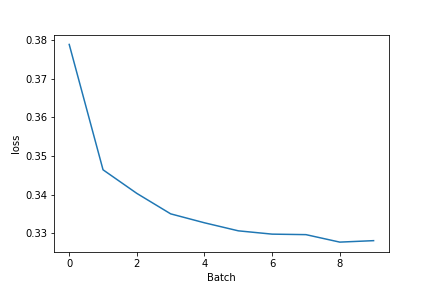

<Figure size 432x288 with 0 Axes>

In [22]:
import numpy as np
avg_losses = np.mean(np.reshape(np.array(losses),(n_epochs,-1)),axis=1)
print(avg_losses)
plt.plot(avg_losses)
# plt.plot(losses)
plt.xlabel("Batch")
plt.ylabel("loss")
plt.show()
plt.show()
plt.savefig("CNNloss.png")

In [ ]:
dataiter = iter(testLoader)
true = []
predict = []
for data in dataiter:
    images = data['input']
    labels = data['target']
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))
    predict.append(predicted)
    true.append(labels)

In [26]:
import time
dataiter = iter(testLoader)
true = []
predict = []
times = [[],[]]
for d in dataiter:
    images = d['input']
    labels = d['target']
    t = time.clock()
    outputs = net(images)
    t1 = time.clock()
    times[0].append(t1-t)
    times[1].append(len(d['target']))
#     _, predicted = torch.max(outputs, 1)
#     print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
#                               for j in range(4)))
#     predict.append(predicted)
#     true.append(labels)
    
times_np = np.array(times)
avgtime = np.mean(times_np[0])#/times_np[1])
error = np.std(times_np[0])/np.sqrt(len(times))
print("Average time per image: {} pm {}".format(avgtime,error))

/home/lewis/.conda/envs/SparseAIEnv/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':
/home/lewis/.conda/envs/SparseAIEnv/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/home/lewis/.conda/envs/SparseAIEnv/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


Average time per image: 187.1709090909201 pm 24.45644225491333


In [24]:
print(times_np)

[[243.9  210.43 173.31 200.53 179.37 199.38 176.03 202.51 185.98 204.99
   84.71]
 [  2.     2.     2.     2.     2.     2.     2.     2.     2.     2.
    2.  ]]


In [9]:
correct = 0
total = 0
snb = 0
radio = 0
outs = []
labs = []
with torch.no_grad():
    for data in testLoader:
        images = data['input']
        labels = data['target']
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        outs.append(outputs.data)
        labs.append(labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        snb += (predicted == 1).sum().item()
        radio += (predicted == 0).sum().item()

    
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
print("SNB: {}".format(snb))
print("Radio: {}".format(radio))

/home/lewis/.conda/envs/SparseAIEnv/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of the network on the 10000 test images: 98 %
SNB: 3752
Radio: 2788


/home/lewis/.conda/envs/SparseAIEnv/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


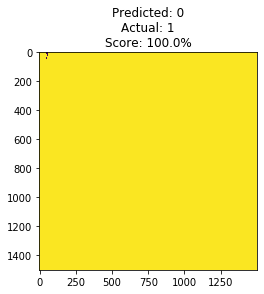

tensor([[254, 254, 254,  ..., 254, 254, 254],
        [254, 254, 254,  ..., 254, 254, 254],
        [254, 254, 254,  ..., 254, 254, 254],
        ...,
        [254, 254, 254,  ..., 254, 254, 254],
        [254, 254, 254,  ..., 254, 254, 254],
        [254, 254, 254,  ..., 254, 254, 254]], dtype=torch.uint8)


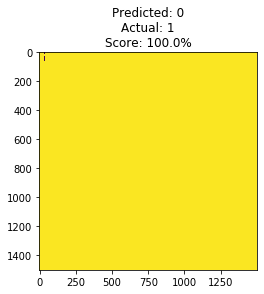

tensor([[254, 254, 254,  ..., 254, 254, 254],
        [254, 254, 254,  ..., 254, 254, 254],
        [254, 254, 254,  ..., 254, 254, 254],
        ...,
        [254, 254, 254,  ..., 254, 254, 254],
        [254, 254, 254,  ..., 254, 254, 254],
        [254, 254, 254,  ..., 254, 254, 254]], dtype=torch.uint8)


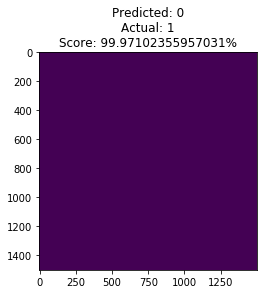

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)


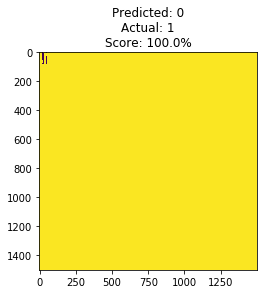

tensor([[254, 254, 254,  ..., 254, 254, 254],
        [254, 254, 254,  ..., 254, 254, 254],
        [254, 254, 254,  ..., 254, 254, 254],
        ...,
        [254, 254, 254,  ..., 254, 254, 254],
        [254, 254, 254,  ..., 254, 254, 254],
        [254, 254, 254,  ..., 254, 254, 254]], dtype=torch.uint8)


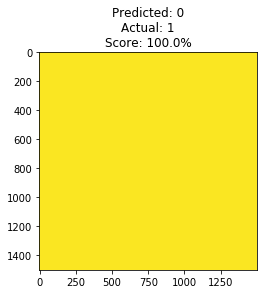

tensor([[254, 254, 254,  ..., 254, 254, 254],
        [254, 254, 254,  ..., 254, 254, 254],
        [254, 254, 254,  ..., 254, 254, 254],
        ...,
        [254, 254, 254,  ..., 254, 254, 254],
        [254, 254, 254,  ..., 254, 254, 254],
        [254, 254, 254,  ..., 254, 254, 254]], dtype=torch.uint8)


KeyboardInterrupt: 

In [22]:
from sklearn.metrics import confusion_matrix
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in testLoader:
        images = data['input']
        labels = data['target']
        
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        
        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                plt.imshow(images[i].reshape((1500,1500)))
                plt.title("Predicted: {}\nActual: {}\nScore: {}%".format(predicted[i],labels[i],outputs[i][predicted[i]]*100))
                plt.show()
                print(images[i].reshape((1500,1500)))
        for i in range(2):
            label = classes[i]
            class_correct[i] += c[i].item()
            class_total[i] += 1


for i in range(2):
    print('Accuracy of %5s : %5d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))



In [ ]:
import seaborn as sn
df_cm = pd.DataFrame(cm, range(6), range(6))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.978


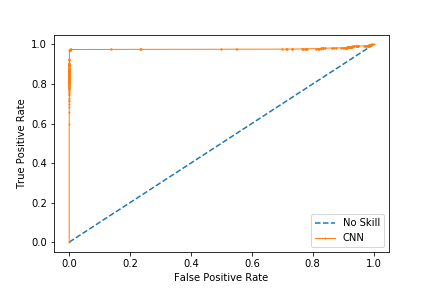

In [106]:
# import seaborn as sn
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
Y_test = torch.cat(labs).numpy()
ns_probs = [0 for _ in range(len(Y_test))]
lr_probs = torch.cat(outs).numpy()[:,1]

# keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.',markersize=2,linewidth=1, label='CNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
# plt.show()
plt.savefig("CNNroc1.png",dpi=500,bbox_inches='tight')
# plt.xlim(0,0.001)
plt.show()

In [ ]:
from torch.utils.tensorboard import SummaryWriter
# from tensorboard.summary.writer.record_writer import RecordWriter
# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter("runs/CNN")
# import tensorboard

In [ ]:
https://www.facebook.com/groups/2009507865950023/permalink/2716336138600522/dataiter = iter(trainLoader)
data = dataiter.next()


In [ ]:

writer.add_graph(net, data['input'])
# writer.close()

In [ ]:
#taken from Andreas Sogaard DAML helper code
# from . import plot
# from . import utilities    as _utilities
# from . import optimisation as _optimisation
# from . import _internal# from . import optimisation

def roc (*clfs, y=None, pred=None, target_eff=0.5, scale='log',xlim=[0,1]):
    """
    Plot the so-called receiver operating characteristic (ROC) curve(s) for the 
    classifier(s) `clfs`.
    
    Arguments:
        clfs: Variable-length list of scikit-learn classifiers, such as 
            sklearn.neural_network.MLPClassifier, or Keras networks, of type 
            keras.models.Model. The classifiers are assumed to have been fitted 
            on the same set of features to classify only two target classes 
            either using their respective  `fit`-methods, or using the 
            `utilities.fit` method. These are specified in the function call as 
            e.g.:
            ```
            plot.roc(clf1, clf2, clf3, X=X_test, y=y_test);
            ```
            *Please note* that the remaining arguments have to be specified as 
            keywords, i.e. using the `..., kw=<something>, ...` syntax suggested 
            above.
        X: numpy.array, of shape (nb_samples, nb_features), containing the array 
            of features on which the classifier(s) should be evaluated.
        y: numpy.array, of shape (nb_samples, 1), containing the list targets 
            classes, assumed to be either 0 or 1.
        target_eff: Float, the target signal (y = 1) efficiency at which the 
            corresponding background rejection rate should be evaluated.
        scale: String, either 'log' or 'linear', specifying the type of y-axis 
            scale to draw.
            
    Raises:
        AssertionError, if any of the checks fail.
        
    Returns:
        pyplot.figure containing the ROC curve plot.
    """
    
    # Check(s)
#     assert X is not None, \
#         "Please specify a testing dataset, `X`."
    assert y is not None, \
        "Please specify true labels, `y`."
#     assert X.shape[0] == y.shape[0]
    assert len(y.squeeze().shape) == 1
    
    # Import(s)
    from sklearn.metrics import roc_curve    
    
    # Create figure
    fig, ax = plt.subplots(figsize=(5,4))
    
    # Random guessing line
    tpr = np.linspace(0, 1, 200 + 1, endpoint=True)[1:]
    ax.plot(tpr, 1./tpr, ls='--', c="blue",label='No Skill')
    
    # ROC curves
    rocs = list()
    for clf in clfs:
#         pred = get_output(clf, X)
        sign = 1. if pred[y == 1].mean() > pred[y == 0].mean() else -1.
        fpr, tpr, _ = roc_curve(y, sign * pred)
        
        # Filter out entries with no background passing
        msk = (fpr > 0)
        tpr = tpr[msk]
        fpr = fpr[msk]
        
        # Plot ROC curve
        ax.plot(tpr, 1./fpr, c="orange",marker=".")#, label=_utilities.get_network_name(clf))
        
        # Store efficiency arrays
        rocs.append((tpr, fpr))
        pass
    
    # Indicate best result
    best_rejection = -np.inf
    best_clfs      = []
    ax.axvline(target_eff, c='darkgray', ls=':', lw=1)
    for ix, (clf, (tpr, fpr)) in enumerate(zip(clfs, rocs)):
        if target_eff < tpr.min():
            print("No valid background rejection rate at target efficiency ({:.0f}%) for model: {}")#.format(target_eff * 100., _utilities.get_network_name(clf)))
            best_rejection = np.inf
            best_clfs.append(ix)
            continue
            
        rejection = np.interp(target_eff, tpr, 1./fpr)
      
        if rejection > best_rejection:
            best_rejection = rejection
            best_clfs.append(ix)
            pass
        pass
         
    # Decorations
    ax.set_yscale(scale)
    ax.set_xlim(0, 1)
    ax.set_xlabel("Signal efficiency")
    ax.set_ylabel("Background rejection factor")
   
    if not np.isinf(best_rejection):
        frac = 0.03
        
        x = target_eff
        y = best_rejection
        y1, y2 = ax.get_ylim()
        
        logyDraw = (np.log10(y) - np.log10(y1) + frac * (np.log10(y2) - np.log10(y1))) + np.log10(y1)

        xDraw = x - frac * (1. - 0.)
        yDraw = np.power(10, logyDraw)

        ax.plot(target_eff, best_rejection, 'r*')
        digits = 1 if best_rejection < 100 else 0
        ax.text(xDraw, yDraw, f'x{{:.{digits}f}}'.format(best_rejection), fontdict={'weight': 600})
        pass
    
    # Draw legend and boldface the best instance(s)
    l = ax.legend()
    plt.xlim(xlim)
    for ix, text in enumerate(l.get_texts()[1:]):
        if ix in best_clfs:
            text._fontproperties = l.get_texts()[0]._fontproperties.copy()
            text.set_weight(600)
            pass
        pass
   
    return fig

In [ ]:
print(len(lr_probs))
f = roc(net,y=Y_test,pred=lr_probs,target_eff=0.971,scale='log',xlim=[0.8,1])
# plt.show()
f.savefig("CNNroc2.png",bbox_inches='tight',dpi=500)